# Music Genre Classification Model


Goal: Classify genre of music given metadata of a song, such as spectral bandwidth and zero crossing rate. The dataset, found on Kaggle, contains 9990 songs and 26 features (metadata extracted from audio file). To approach this task, different machine learning classification models were utilized, including Decision Tree, K-Nearest Neighbors, Naive Bayes, Support Vector Classification, and Random Forest model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Loading Data from Excel File

In [3]:
raw_data = pd.read_excel("genres.xlsx")
data = raw_data.dropna(how="any")

data.shape

(9990, 28)

In [4]:
print(data.head())

            filename  chroma_stft_mean  rms_mean  spectral_centroid_mean  \
0  blues.00000.0.wav          0.335406  0.130405             1773.065032   
1  blues.00000.1.wav          0.343065  0.112699             1816.693777   
2  blues.00000.2.wav          0.346815  0.132003             1788.539719   
3  blues.00000.3.wav          0.363639  0.132565             1655.289045   
4  blues.00000.4.wav          0.335579  0.143289             1630.656199   

   spectral_bandwidth_mean  rolloff_mean  zero_crossing_rate_mean  mfcc1_mean  \
0              1972.744388   3714.560359                 0.081851 -118.627914   
1              2010.051501   3869.682242                 0.087173 -125.590706   
2              2084.565132   3997.639160                 0.071383 -132.441940   
3              1960.039988   3568.300218                 0.069426 -118.231087   
4              1948.503884   3469.992864                 0.070095 -105.968376   

   mfcc2_mean  mfcc3_mean  ...  mfcc12_mean  mfcc13_mean

# Data Visualization

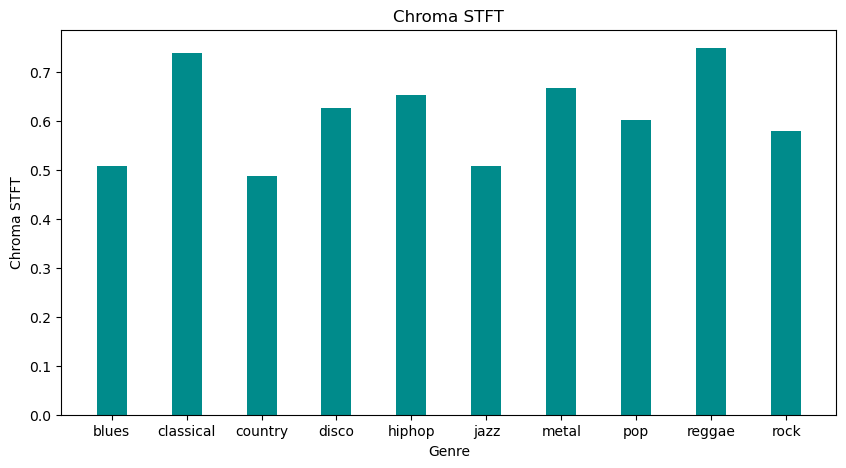

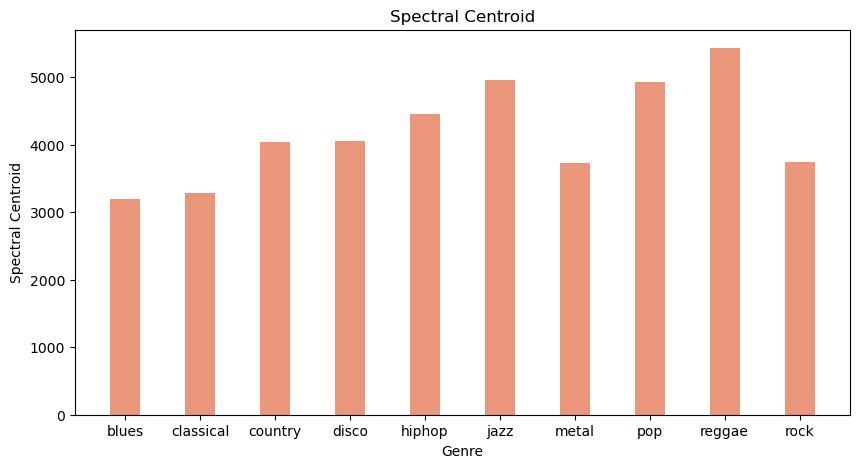

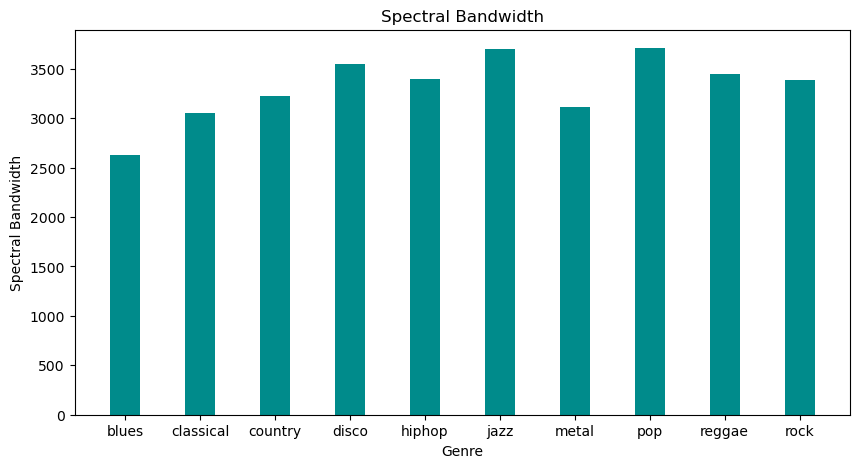

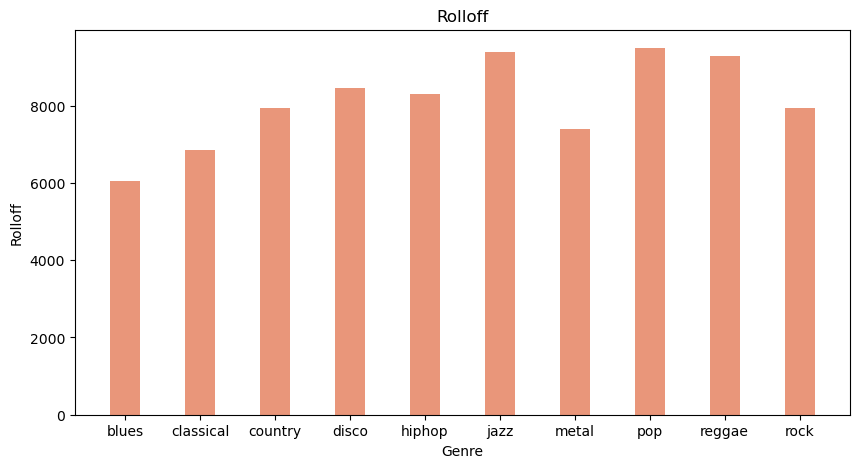

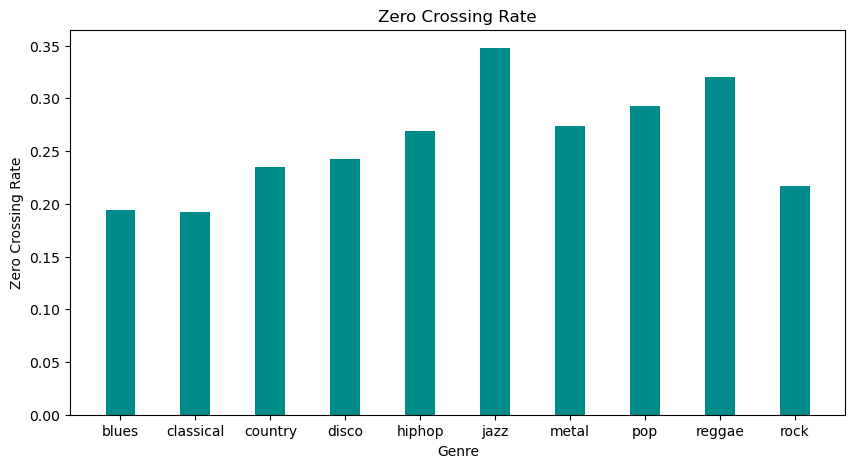

In [12]:
genre = data['label']
chroma_stft = data['chroma_stft_mean']
fig = plt.figure(figsize = (10,5))
plt.bar(genre, chroma_stft, color = 'DarkCyan', width=0.4)
plt.xlabel("Genre")
plt.ylabel("Chroma STFT")
plt.title("Chroma STFT")
plt.show()

spectral_centroid = data['spectral_centroid_mean']
fig = plt.figure(figsize = (10,5))
plt.bar(genre, spectral_centroid, color = 'DarkSalmon', width=0.4)
plt.xlabel("Genre")
plt.ylabel("Spectral Centroid")
plt.title("Spectral Centroid")
plt.show()

spectral_bandwidth = data['spectral_bandwidth_mean']
fig = plt.figure(figsize = (10,5))
plt.bar(genre, spectral_bandwidth, color = 'DarkCyan', width=0.4)
plt.xlabel("Genre")
plt.ylabel("Spectral Bandwidth")
plt.title("Spectral Bandwidth")
plt.show()

rolloff = data['rolloff_mean']
fig = plt.figure(figsize = (10,5))
plt.bar(genre, rolloff, color = 'DarkSalmon', width=0.4)
plt.xlabel("Genre")
plt.ylabel("Rolloff")
plt.title("Rolloff")
plt.show()

zero_crossing = data['zero_crossing_rate_mean']
fig = plt.figure(figsize = (10,5))
plt.bar(genre, zero_crossing, color = 'DarkCyan', width=0.4)
plt.xlabel("Genre")
plt.ylabel("Zero Crossing Rate")
plt.title("Zero Crossing Rate")
plt.show()

# Separating data into input and output variables

In [13]:
X = data.iloc[:, 1:-1]
print(X)

      chroma_stft_mean  rms_mean  spectral_centroid_mean  \
0             0.335406  0.130405             1773.065032   
1             0.343065  0.112699             1816.693777   
2             0.346815  0.132003             1788.539719   
3             0.363639  0.132565             1655.289045   
4             0.335579  0.143289             1630.656199   
...                ...       ...                     ...   
9985          0.349126  0.050019             1499.083005   
9986          0.372564  0.057897             1847.965128   
9987          0.347481  0.052403             1346.157659   
9988          0.387527  0.066430             2084.515327   
9989          0.369293  0.050524             1634.330126   

      spectral_bandwidth_mean  rolloff_mean  zero_crossing_rate_mean  \
0                 1972.744388   3714.560359                 0.081851   
1                 2010.051501   3869.682242                 0.087173   
2                 2084.565132   3997.639160                 0.0

In [14]:
y = data.iloc[:,-1]
print(y)

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object


# Splitting data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale/Normalize data

In [26]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# K-Nearest Neighbors Model

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

# Decision Tree Model

In [28]:
dtree = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_predictions)
dtree_cm = confusion_matrix(y_test, dtree_predictions)

# Naive Bayes Model

In [29]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_predictions)
gnb_cm = confusion_matrix(y_test, gnb_predictions)

# Random Forest Model

In [30]:
rand_for = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
rand_predictions = rand_for.predict(X_test)
rand_acc = accuracy_score(y_test, rand_predictions)
rand_cm = confusion_matrix(y_test, rand_predictions)

# Support Vector Classification Model

In [31]:
svm_model=SVC().fit(X_train,y_train)
svm_predictions = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

# Accuracy Score and Confusion Matrix

In [32]:
print("K-Nearest Neighbors Accuracy Score: " + str(round(knn_acc, 2)))
print("\nK-Nearest Neighbors Confusion Matrix:")
print(knn_cm)


print("\n\nRandom Forest Model Accuracy Score: " + str(round(rand_acc, 2)))
print("\nRandom Forest Model Confusion Matrix:")
print(rand_cm)


print("\n\nSupport Vector Classification Accuracy Score: " + str(round(svm_acc, 2)))
print("\nSupport Vector Classification Confusion Matrix:")
print(svm_cm)


print("\n\nNaive Bayes Model Accuracy Score: " + str(round(gnb_acc, 2)))
print("\nNaive Bayes Model Confusion Matrix:")
print(gnb_cm)


print("\n\nDecision Tree Model Accuracy Score: " + str(round(dtree_acc, 2)))
print("\nDecision Tree Model Confusion Matrix:")
print(dtree_cm)

K-Nearest Neighbors Accuracy Score: 0.9

K-Nearest Neighbors Confusion Matrix:
[[218   1   5   2   0   2   1   0   4   4]
 [  0 183   3   0   0   6   0   0   1   1]
 [  4   2 154   3   1   6   0   0   9   5]
 [  1   0   1 174   3   3   2   3   2  10]
 [  1   0   3   2 188   0   2   2   3   0]
 [  2   9   2   4   3 184   0   2   0   3]
 [  0   1   1   0   2   0 174   0   0   3]
 [  0   0   2  10   5   6   0 166   0   1]
 [  0   1   2   3   2   3   0   3 179   2]
 [  2   1   3  15   2   4   4   1   3 173]]


Random Forest Model Accuracy Score: 0.83

Random Forest Model Confusion Matrix:
[[195   1  12   0   1  12   6   0   4   6]
 [  1 179   4   0   0   9   0   0   0   1]
 [  5   2 140   1   2   8   0   7  12   7]
 [  2   0   2 168   5   1   2   4   6   9]
 [  2   1   2   5 172   1   5   8   5   0]
 [  6  19   9   2   3 164   0   1   4   1]
 [  3   0   1   3   1   0 168   1   0   4]
 [  0   0   5   8   1   2   0 167   7   0]
 [  1   2   5   3   7   3   2   2 165   5]
 [  6   3  13   9   2

# Classification Report

In [33]:
knn_report = sklearn.metrics.classification_report(y_test, knn_predictions)
print("K-Nearest Neighbors Report:")
print(knn_report)

rand_report = sklearn.metrics.classification_report(y_test, rand_predictions)
print("\n\nRandom Forest Report:")
print(rand_report)

svm_report = sklearn.metrics.classification_report(y_test, svm_predictions)
print("\n\nSupport Vector Classification Report:")
print(svm_report)

gnb_report = sklearn.metrics.classification_report(y_test, gnb_predictions)
print("\n\nNaive Bayes Report:")
print(gnb_report)

dtree_report = sklearn.metrics.classification_report(y_test, dtree_predictions)
print("\n\nDecision Tree Report:")
print(dtree_report)

K-Nearest Neighbors Report:
              precision    recall  f1-score   support

       blues       0.96      0.92      0.94       237
   classical       0.92      0.94      0.93       194
     country       0.88      0.84      0.86       184
       disco       0.82      0.87      0.84       199
      hiphop       0.91      0.94      0.92       201
        jazz       0.86      0.88      0.87       209
       metal       0.95      0.96      0.96       181
         pop       0.94      0.87      0.90       190
      reggae       0.89      0.92      0.90       195
        rock       0.86      0.83      0.84       208

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



Random Forest Report:
              precision    recall  f1-score   support

       blues       0.88      0.82      0.85       237
   classical       0.86      0.92      0.89       194
     country       0.73   

C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
